Pre-lecture HW

1)

A classification decision tree is used to classify data into predefined categories by splitting a dataset into branches based on feature values, classifying data into different classes. The type of problem a classification tree aims to solve is the ones where we want to classify data into different classes based on their features, with categorical outcomes, multi-class classification, and binary classification. Some real world applications include medical diagnosis', fraud detection in finance, personalized recommendations and more. Unlike the classification decision tree, a multiple linear regression model predicts continuous numerical value based on one or more input features, so it is non-categorical. While the classification decision tree splits the data into branches based on its features, the multiple linear regression model fits a linear equation that best explains the relationship between the predictors and the output. 

2.1)

A real-world application scenario that may be most appropriately addressed by accuracy could be quality control in. manufacturing, as in a dataset where the amount of defective and non-defective items are similar, accuracy helps determine how often the model the model correctly classifies the items.

2.2)

Sensitivity is important in real-world application scenarios such as medical diagnoses for serious diseases. Sensitivity is important because having false negatives in these cases can lead to severe consquences for patients. Sensitivity makes sure we can measure the proportion of actual cases that are correctly identified. 

2.3)

Specificity is important in scenarios including spam detection messages. It is important that important emails are not incorrectly marked as spam mail. 

2.4)

Precision in search engines is important, ensuring that the search results are relevant to the given input so the right information is presented. This makes the experience more effective and time efficient, as fewer false positives are given. 

Summary of Chatbot Session 1: "Here's a summary of our session:

- **Classification Decision Tree**: We discussed how this type of decision tree works by splitting data into branches to classify data into categories based on input features. It handles classification tasks like determining whether an email is spam.

- **Comparison with Multiple Linear Regression**: We compared how a Classification Decision Tree makes predictions by splitting data into discrete categories, while Multiple Linear Regression makes continuous predictions based on linear relationships between inputs and outputs.

- **Metrics Discussions**: 
  - **Accuracy**: It measures the proportion of correct predictions in a classification model and is useful in balanced datasets.
  - **Sensitivity (Recall)**: It measures the proportion of actual positives correctly identified, especially useful when minimizing false negatives is crucial (e.g., medical tests for severe diseases).
  - **Specificity**: It measures the proportion of actual negatives correctly identified, important when minimizing false positives is critical (e.g., reducing false alarms in security systems).
  - **Precision**: It measures the proportion of positive identifications that are actually correct, useful when minimizing false positives is necessary (e.g., spam detection systems).

Feel free to continue the discussion or ask about anything specific!"

Link to Chatbot Session 1: https://chatgpt.com/share/673ab963-96b4-8005-87d7-ac27677b409b

3)

<Figure size 1000x600 with 0 Axes>

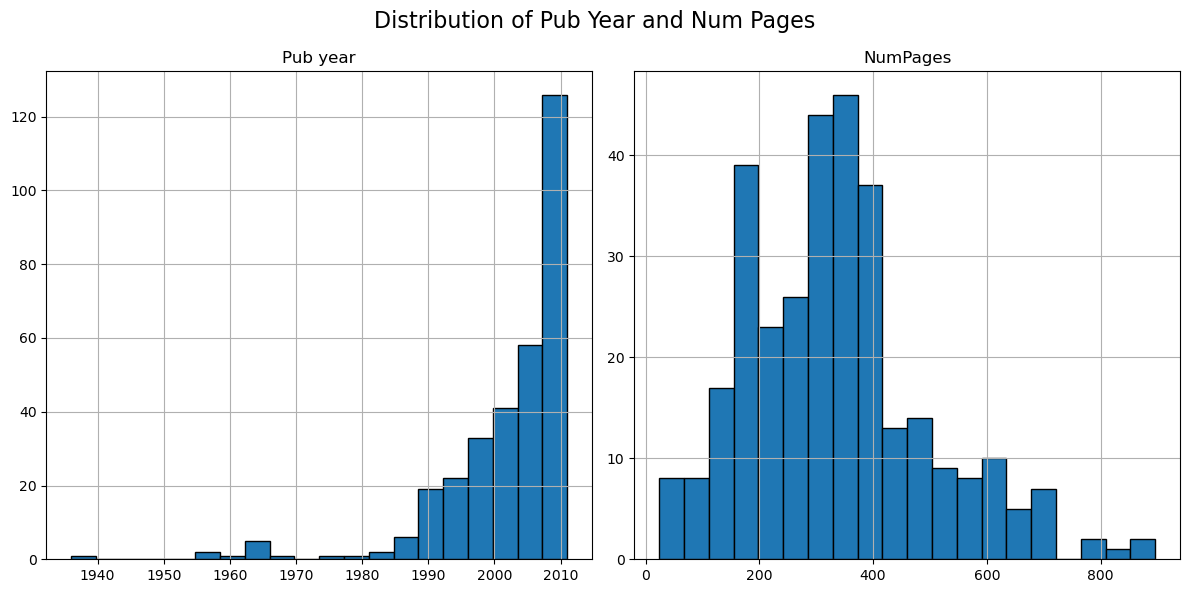

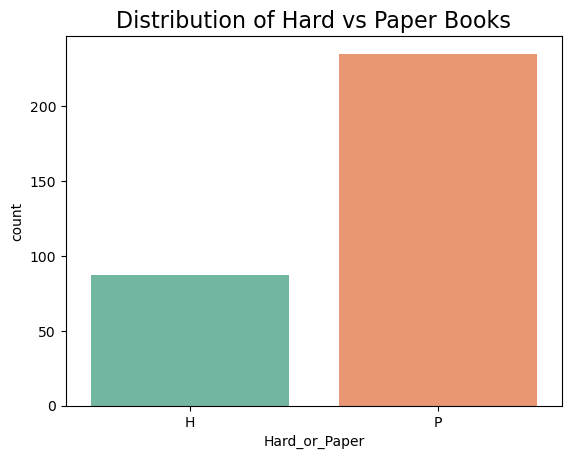

Summary Statistics:
                   Title        Author  List Price  Amazon Price  \
count                319           319  319.000000    319.000000   
unique               309           251         NaN           NaN   
top     The Great Gatsby  Jodi Picoult         NaN           NaN   
freq                   3             7         NaN           NaN   
mean                 NaN           NaN   18.362978     12.941034   
std                  NaN           NaN   13.976755     12.436673   
min                  NaN           NaN    1.500000      0.770000   
25%                  NaN           NaN   13.890000      8.600000   
50%                  NaN           NaN   15.000000     10.200000   
75%                  NaN           NaN   19.360000     12.560000   
max                  NaN           NaN  139.950000    139.950000   

       Hard_or_Paper    NumPages Publisher     Pub year    ISBN-10       Thick  
count            319  319.000000       319   319.000000        319  319.000000  
u

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Remove Weight_oz, Width, and Height columns
ab_reduced = ab.drop(columns=['Weight_oz', 'Width', 'Height'])

# Drop rows with NaN values in 'Pub year' and 'NumPages'
ab_reduced = ab_reduced.dropna(subset=['Pub year', 'NumPages'])

# Convert 'Pub year' and 'NumPages' to integers, and 'Hard_or_Paper' to categorical
ab_reduced['Pub year'] = ab_reduced['Pub year'].astype(int)
ab_reduced['NumPages'] = ab_reduced['NumPages'].astype(int)
ab_reduced['Hard_or_Paper'] = ab_reduced['Hard_or_Paper'].astype('category')

# Drop any remaining rows with NaN values
ab_reduced_noNaN = ab_reduced.dropna()

# Display summary statistics for numerical and categorical data
summary = ab_reduced_noNaN.describe(include='all')

# Show data types
data_types = ab_reduced_noNaN.dtypes

# Visualize the distributions
plt.figure(figsize=(10, 6))

# Distribution of numerical columns (Pub year, NumPages)
ab_reduced_noNaN[['Pub year', 'NumPages']].hist(bins=20, edgecolor='black', figsize=(12, 6))
plt.suptitle('Distribution of Pub Year and Num Pages', fontsize=16)
plt.tight_layout()
plt.show()

sns.countplot(data=ab_reduced, x='Hard_or_Paper', hue='Hard_or_Paper', palette='Set2', legend=False)  # Count plot for 'Hard_or_Paper'
plt.title('Distribution of Hard vs Paper Books', fontsize=16)
plt.show()

# Display summary statistics and data types
print("Summary Statistics:")
print(summary)

print("\nData Types:")
print(data_types)


4)

In [2]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Assuming `ab_reduced_noNaN` is your preprocessed DataFrame
# Split the data into training and test sets (80/20 split)
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(ab_reduced, test_size=0.2, random_state=42)

# Report the number of observations in the training and testing datasets
print("Number of observations in the training set:", len(ab_reduced_noNaN_train))
print("Number of observations in the test set:", len(ab_reduced_noNaN_test))


Number of observations in the training set: 257
Number of observations in the test set: 65


The chatbot helped me create a 80/20 split using train_test_split(). Number of observations in the training set: 257, Number of observations in the test set: 65

The two lines of code "y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']" and "X = ab_reduced_noNaN[['List Price']]" are preparing the data for training a DecisionTreeClassifier model in scikit-learn. The first converts the categorical variable Hard_or_Paper into a one-hot encoded format, which is used to convert categorical variables into a numerical input form that can be used by machine learning algorithms. The second selects 'List Price' column from ab_reduced_noNaN and assigns it to X to be used as a predictor variable in the model (use the List Price to predict whether the book is hardcover based on the value of y).

Accuracy: 0.84375

Classification Report:
               precision    recall  f1-score   support

       False       0.87      0.91      0.89        44
        True       0.78      0.70      0.74        20

    accuracy                           0.84        64
   macro avg       0.82      0.80      0.81        64
weighted avg       0.84      0.84      0.84        64



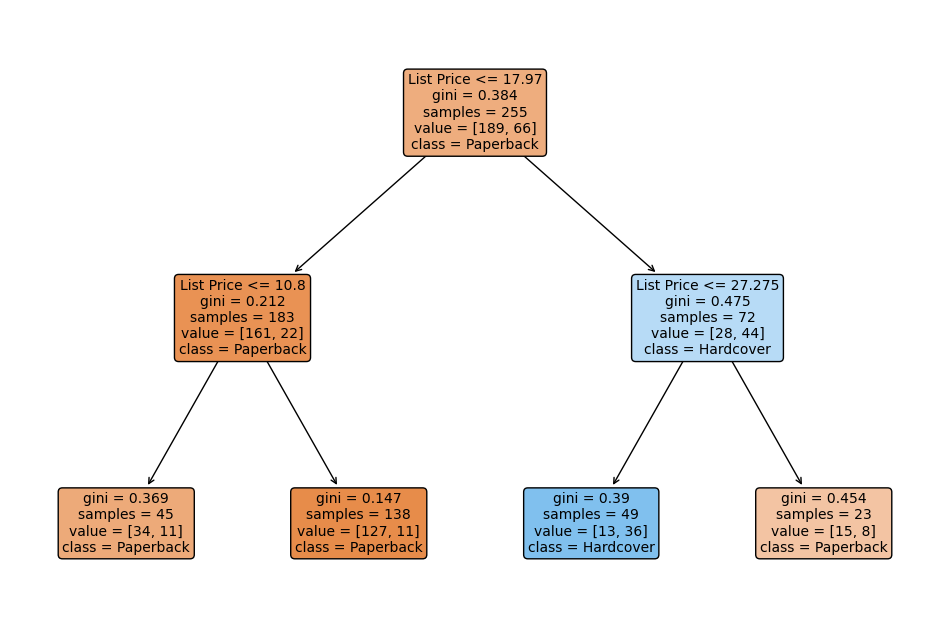

In [3]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Prepare your feature (X) and target (y)
X = ab_reduced_noNaN[['List Price']]  # Feature: List Price
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  # Target: Hardcover (1) or not (0)

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the DecisionTreeClassifier model with max_depth = 2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Train the model using the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, 
          feature_names=['List Price'],  # Feature used for splitting
          class_names=['Paperback', 'Hardcover'],  # Class labels for target variable
          filled=True,  # Color the nodes based on the class
          rounded=True,  # Make the tree nodes rounded
          fontsize=10)  # Set the font size for clarity
plt.show()


The predictions made based on the List Price for the fitted clf model is that if the books List Price is below the threshold determined by the decision tree, the model will likely predict Paperback, but if it is above the threshold, the model predicts it as a Hardback. The threshold can be seen from the decision tree clf model. 

Summary of Chatbot Session 2: "Here's a summary of our chatbot session:

1. **Dataset Preprocessing**: You started with a dataset (`amazonbooks.csv`) and applied several preprocessing steps:
   - Removed unnecessary columns (`Weight_oz`, `Width`, `Height`).
   - Dropped rows with missing (`NaN`) values.
   - Converted `Pub year` and `NumPages` to integer types.
   - Converted `Hard_or_Paper` to a categorical type.

2. **Exploratory Data Analysis (EDA)**:
   - You visualized the distribution of the `Hard_or_Paper` column using a `countplot`.
   - You analyzed the distribution of books by `List Price`.

3. **Data Splitting**: 
   - You split the data into training and testing sets (80/20 split) using `train_test_split()`.

4. **Training a Model**: 
   - You trained a **DecisionTreeClassifier** with `max_depth=2` to predict whether a book is hardcover or paperback based on its `List Price`.
   - You evaluated the model’s accuracy and displayed the classification report.

5. **Model Interpretation**: 
   - You used `plot_tree()` to visualize the decision tree and explained how predictions are made based on `List Price`. Books with lower `List Price` are likely predicted as **paperback**, while those with higher `List Price` are predicted as **hardcover**.

If you'd like to go deeper into any of these steps or need further assistance, feel free to ask!"

Link to Chatbot Session 2: https://chatgpt.com/share/673ad326-fbf0-8005-8a9a-4af34de03004

Post-lecture HW

5)

Accuracy: 0.8307692307692308

Classification Report:
               precision    recall  f1-score   support

       False       0.90      0.88      0.89        50
        True       0.62      0.67      0.65        15

    accuracy                           0.83        65
   macro avg       0.76      0.77      0.77        65
weighted avg       0.83      0.83      0.83        65



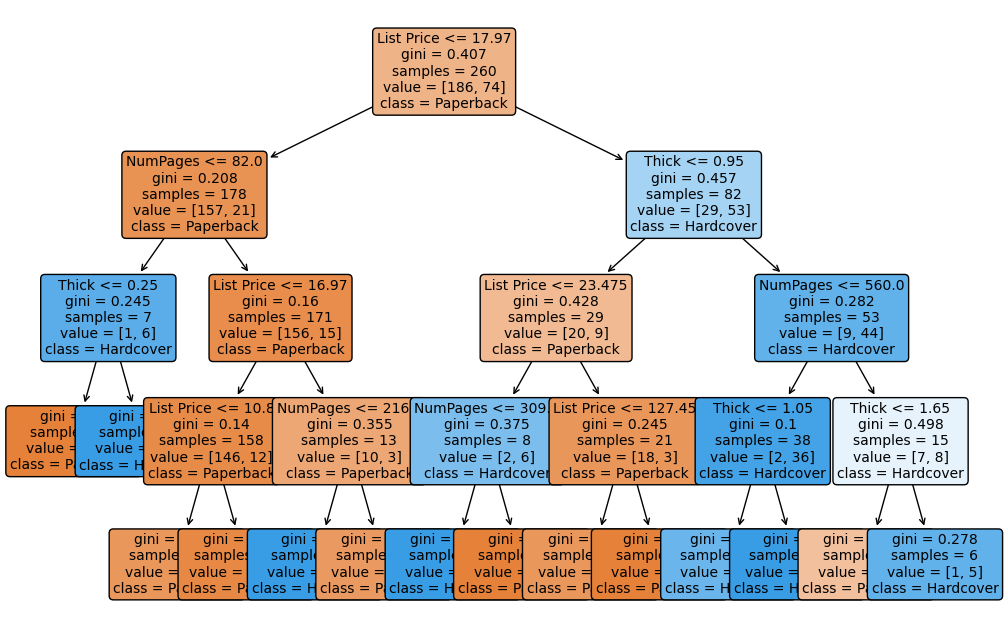

In [23]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Prepare the feature set (X) and target variable (y)
X = ab[['NumPages', 'Thick', 'List Price']]  # Multiple features
y = pd.get_dummies(ab["Hard_or_Paper"])['H']  # Target: Hardcover (1) or not (0)

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the DecisionTreeClassifier model with max_depth = 4
clf = tree.DecisionTreeClassifier(max_depth=4, random_state=42)

# Train the model using the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, 
          feature_names=['NumPages', 'Thick', 'List Price'],  # Features used for splitting
          class_names=['Paperback', 'Hardcover'],  # Class labels for target variable
          filled=True,  # Color the nodes based on the class
          rounded=True,  # Make the tree nodes rounded
          fontsize=10)  # Set the font size for clarity
plt.show()


Summary of Chatbot Session 3: "Here's a summary of our session:

1. **Model Visualization and Explanation:**
   - We discussed a decision tree model based on the feature `'List Price'` and a more complex tree model using `'NumPages'`, `'Thick'`, and `'List Price'`.
   - I explained the decision-making process of the decision tree classifiers.

2. **Metrics Calculation:**
   - You asked for the creation and evaluation of confusion matrices, sensitivity, specificity, and accuracy for various models.
   - I encountered a data access issue when trying to compute metrics for one of your models using an online dataset.

3. **Data Analysis:**
   - We discussed a data visualization task involving book attributes, such as `'Pub year'` and `'NumPages'`, with histograms and count plots.
   - I provided explanations of the code's purpose and how it visualizes data distributions.

4. **Building a Classifier:**
   - I created a simple decision tree classifier using `'NumPages'` and `'Pub year'` to predict `'Hard_or_Paper'`.
   - An error occurred because `ab_reduced_noNaN` was not defined in the execution environment, leading to a lack of complete metrics generation.

Feel free to continue if you have additional questions or need further assistance!"

Link to Chatbot Session 3: https://chatgpt.com/share/673b8c61-bb04-8005-a248-3cc1801916e4

6)

clf:

Accuracy: 0.84375

Classification Report:
               precision    recall  f1-score   support

       False       0.87      0.91      0.89        44
        True       0.78      0.70      0.74        20

    accuracy                           0.84        64
   macro avg       0.82      0.80      0.81        64
weighted avg       0.84      0.84      0.84        64



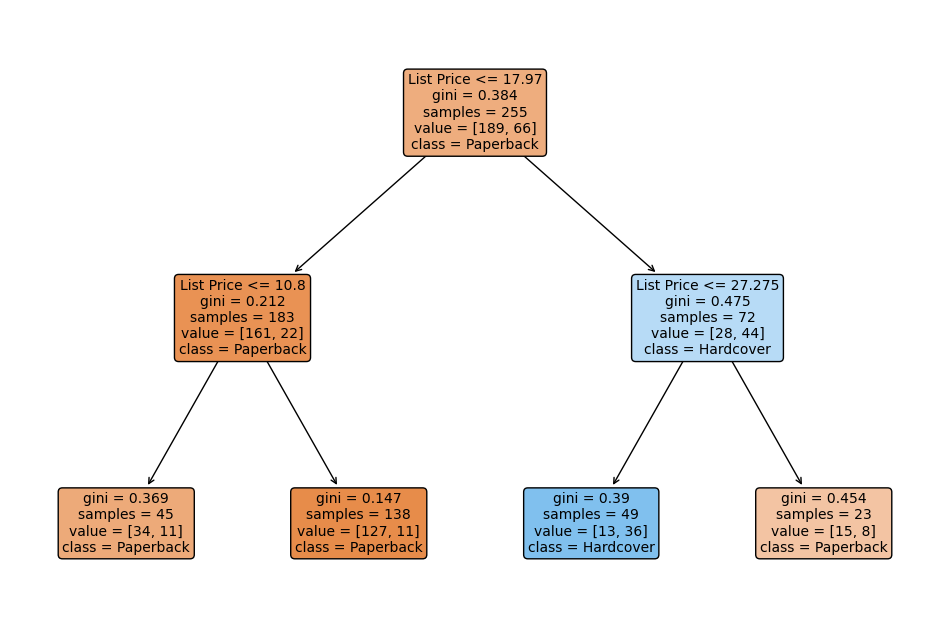

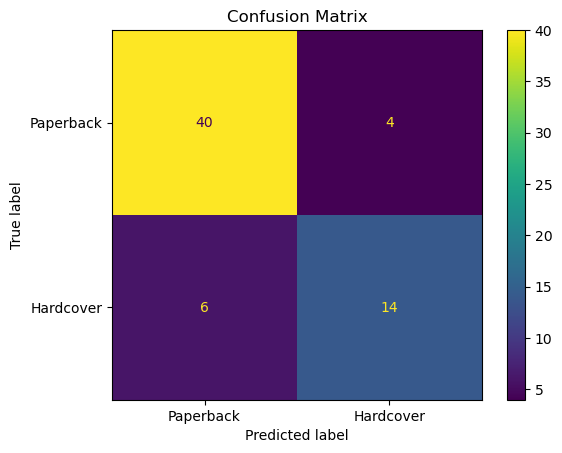

Sensitivity (Recall for positive class): 0.70
Specificity (Recall for negative class): 0.91
Accuracy: 0.84


In [4]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
import graphviz as gv
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Load dataset and prepare data
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Prepare feature and target
X = ab_reduced_noNaN[['List Price']]  # Feature: List Price
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  # Target: Hardcover (1) or not (0)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree model
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=['List Price'], class_names=['Paperback', 'Hardcover'], filled=True, rounded=True, fontsize=10)
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Paperback', 'Hardcover'])
disp.plot(cmap='viridis')  # You can choose different colormaps, e.g., 'viridis', 'Blues'
plt.title("Confusion Matrix")
plt.show()

from sklearn.metrics import confusion_matrix, accuracy_score

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extract values from confusion matrix
TN, FP, FN, TP = cm.ravel()

# Calculate sensitivity, specificity, and accuracy
sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0
specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
accuracy = accuracy_score(y_test, y_pred)

# Print the metrics
print(f"Sensitivity (Recall for positive class): {sensitivity:.2f}")
print(f"Specificity (Recall for negative class): {specificity:.2f}")
print(f"Accuracy: {accuracy:.2f}")


clf2:

Accuracy: 0.8307692307692308

Classification Report:
               precision    recall  f1-score   support

       False       0.90      0.88      0.89        50
        True       0.62      0.67      0.65        15

    accuracy                           0.83        65
   macro avg       0.76      0.77      0.77        65
weighted avg       0.83      0.83      0.83        65



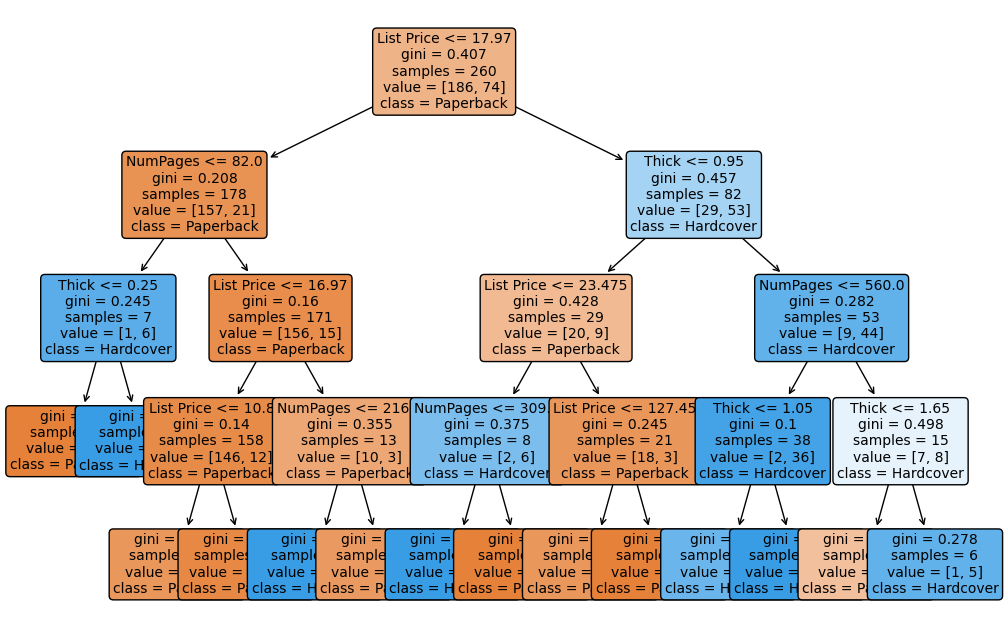

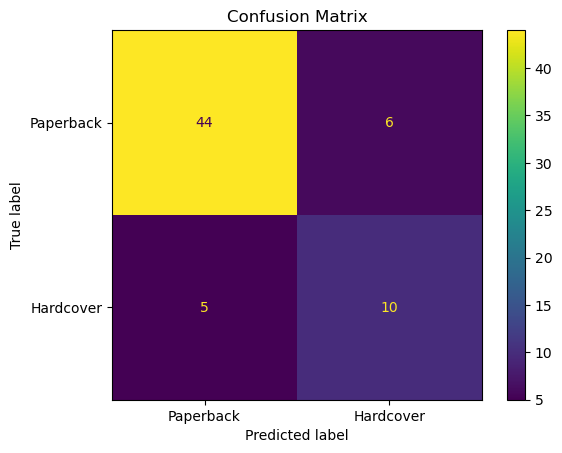

Sensitivity (Recall for positive class): 0.67
Specificity (Recall for negative class): 0.88
Accuracy: 0.83


In [6]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Prepare the feature set (X) and target variable (y)
X = ab[['NumPages', 'Thick', 'List Price']]  # Multiple features
y = pd.get_dummies(ab["Hard_or_Paper"])['H']  # Target: Hardcover (1) or not (0)

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the DecisionTreeClassifier model with max_depth = 4
clf = tree.DecisionTreeClassifier(max_depth=4, random_state=42)

# Train the model using the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, 
          feature_names=['NumPages', 'Thick', 'List Price'],  # Features used for splitting
          class_names=['Paperback', 'Hardcover'],  # Class labels for target variable
          filled=True,  # Color the nodes based on the class
          rounded=True,  # Make the tree nodes rounded
          fontsize=10)  # Set the font size for clarity
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Paperback', 'Hardcover'])
disp.plot(cmap='viridis')  # You can choose different colormaps, e.g., 'viridis', 'Blues'
plt.title("Confusion Matrix")
plt.show()

from sklearn.metrics import confusion_matrix, accuracy_score

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extract the confusion matrix values
TN, FP, FN, TP = cm.ravel()

# Calculate sensitivity, specificity, and accuracy
sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0
specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print(f"Sensitivity (Recall for positive class): {sensitivity:.2f}")
print(f"Specificity (Recall for negative class): {specificity:.2f}")
print(f"Accuracy: {accuracy:.2f}")


7)

The difference between the two confusion matrices is caused by the features, as in the first one the model is trained using only the 'List Price' feature from the ab_reduced_noNaN_train dataset, but in the second one the model is trained using three features: 'NumPages', 'Thick', and 'List Price'. Adding more features allows the model to have more information to make predictions, potentially being able to create a more accurate decision boundary. The model using only 'List Price' may be underperforming in comparision to the second model that captures more complexity of distinguishing between hardcover and paperback books. The clf and clf2 pair of confusion matrices are better than the newly given pair of confusion matrices because of multiple reasons. The models clf and clf2 use the target variable Hard_or_Paper while the new pair uses life_exp_good, which doesn't seem to be related to the task of classifying between "Hardcover" and "Paperback" books. The new pair of confusion matrices likely uses a simpler decision tree, which may not capture the complexity of the data. Overall, clf and clf2 can provide more accurate and meaningful predictions. 

Summary of Chatbot Session 4: "Here’s a summary of our chatbot session:

1. **Model Evaluation & Performance Metrics:**
   - We discussed how to evaluate a machine learning model using confusion matrices and performance metrics such as sensitivity, specificity, and accuracy.
   - We explored how to calculate these metrics and interpret them based on confusion matrix values.
   
2. **Comparison of Models:**
   - We compared two pairs of confusion matrices to understand why the second pair of matrices (using a deeper decision tree, multiple features, and the correct target variable) performed better than the first pair (which used an incorrect target variable and a simpler model with fewer features).

3. **Analysis of Feature Sets & Model Design:**
   - The session included a detailed explanation of how the choice of features (e.g., `List Price`, `NumPages`, `Thick`) and model complexity (depth of decision tree) affect model performance.
   - The second pair of confusion matrices was more effective due to the correct use of target variables, better feature selection, and a deeper decision tree to capture more complex patterns.

4. **Code Walkthrough:**
   - We reviewed specific sections of code that involved loading a dataset, preparing feature and target variables, training a decision tree model, making predictions, and evaluating the model using confusion matrices.
   - Various techniques for improving model accuracy, such as including more features and adjusting the tree depth, were discussed.

Would you like any further clarifications or insights?"

Link to Chatbot Session 4: https://chatgpt.com/share/673b975c-6f94-8005-a9e2-72e032e610ee

8)

Accuracy: 0.8307692307692308

Classification Report:
               precision    recall  f1-score   support

       False       0.90      0.88      0.89        50
        True       0.62      0.67      0.65        15

    accuracy                           0.83        65
   macro avg       0.76      0.77      0.77        65
weighted avg       0.83      0.83      0.83        65



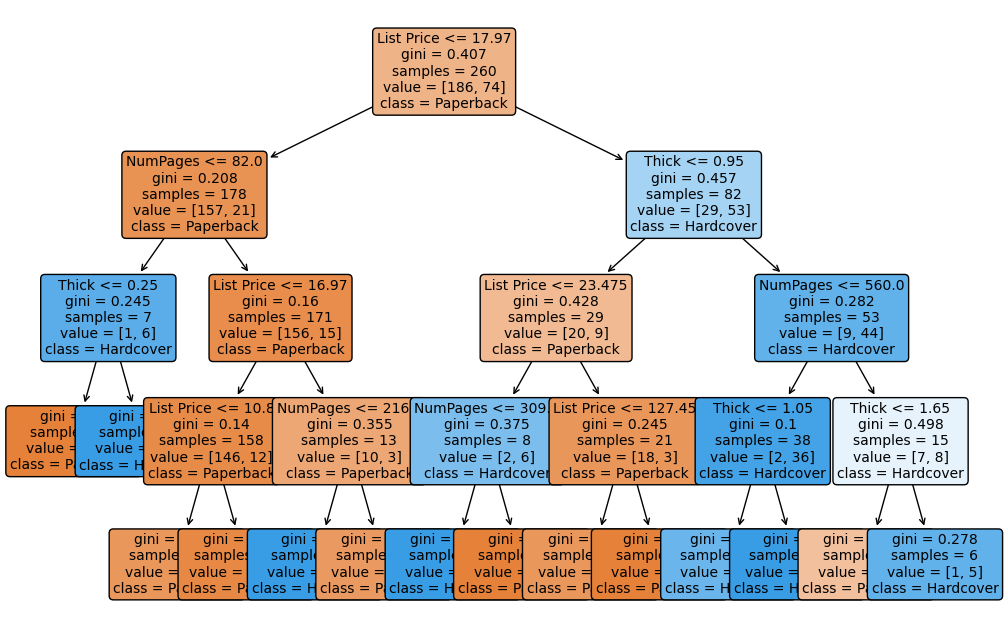

The most important feature for making predictions is 'List Price' with an importance score of nan.


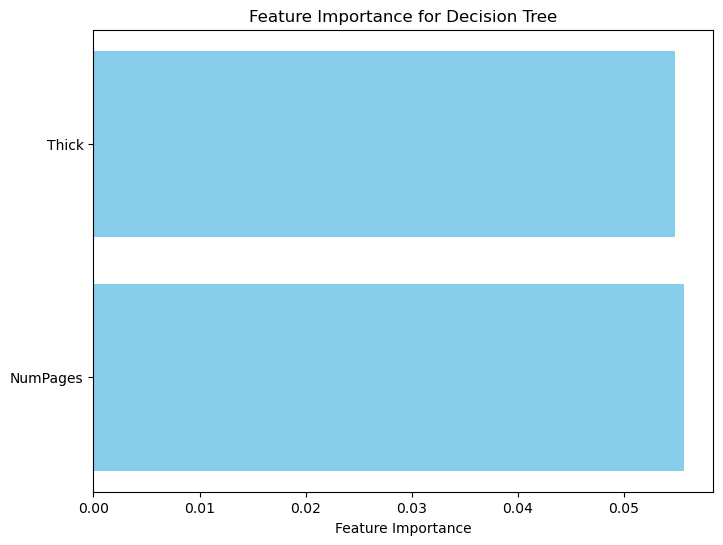

In [9]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Prepare the feature set (X) and target variable (y)
X = ab[['NumPages', 'Thick', 'List Price']]  # Multiple features
y = pd.get_dummies(ab["Hard_or_Paper"])['H']  # Target: Hardcover (1) or not (0)

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the DecisionTreeClassifier model with max_depth = 4
clf = tree.DecisionTreeClassifier(max_depth=4, random_state=42)

# Train the model using the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, 
          feature_names=['NumPages', 'Thick', 'List Price'],  # Features used for splitting
          class_names=['Paperback', 'Hardcover'],  # Class labels for target variable
          filled=True,  # Color the nodes based on the class
          rounded=True,  # Make the tree nodes rounded
          fontsize=10)  # Set the font size for clarity
plt.show()

# Visualize the feature importances
feature_importances = clf.feature_importances_
feature_names = clf.feature_names_in_

# Find the most important feature
most_important_idx = np.argmax(feature_importances)
most_important_feature = feature_names[most_important_idx]
most_important_score = feature_importances[most_important_idx]

# Print the most important feature and its importance score
print(f"The most important feature for making predictions is '{most_important_feature}' with an importance score of {most_important_score:.4f}.")

# Plotting the feature importances as a bar chart
plt.figure(figsize=(8, 6))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Decision Tree')
plt.show()


9)

The differences of interpreting coefficients in linear model regression versus feature importances in decision trees is that linear regression coefficients assume linearity and no interactions, providing direct and interpretable relationships between each feature and the outcome. Decision tree feature importances does not provide direct quantitative relationships with the target variable, but gives the contribution of each feature in reducing the model’s error. They are also influenced by the model's ability to capture complex, non-linear interactions.

Summary of Chatbot Session 5: "I apologize for the confusion. Here’s a more concise and accurate summary of our recent session:

Feature Importance Visualization in Decision Trees: We discussed how to visualize and interpret feature importances in a decision tree model using Scikit-learn, specifically in the context of a dataset predicting book type (hardcover or paperback) based on features like NumPages, Thick, and List Price. We also used .feature_importances_ and .feature_names_in_ to identify and report the most important feature.

Linear Regression vs. Decision Trees: You asked for a comparison of interpreting coefficients in linear regression models and feature importances in decision trees. I explained how linear regression coefficients indicate the direct effect of each predictor on the target variable, while decision tree feature importances measure the relative contribution of each feature to the overall prediction accuracy, often reflecting non-linear relationships.

Let me know if there’s anything specific you’d like to revisit or clarify!"

Link to Chatbot Session 5: https://chatgpt.com/share/673b9be0-946c-8005-abb4-4fbd55635bf8

10) Somewhat